In [15]:
file = 'free_T0.01_i7.gout'

with open(file, 'r') as f:
    lines = f.readlines()
    
print(len(lines[33328].split()))

FileNotFoundError: [Errno 2] No such file or directory: 'free_T0.01_i7.gout'

In [1]:
import glob

glob.glob('free_T150_i*.gout')

['free_T150_i3.gout',
 'free_T150_i5.gout',
 'free_T150_i6.gout',
 'free_T150_i1.gout',
 'free_T150_i4.gout',
 'free_T150_i2.gout',
 'free_T150_i7.gout']

In [16]:
import numpy as np


def get_kpoints_weights_and_coords(file):
    with open(file, 'r') as f:
        lines = f.readlines()
        
    N = 0
    N_begin_klist = len(lines)
    kpoints_weights = []
    kpoints_coords = []
    
    for n, line in enumerate(lines):
        if 'Brillouin zone sampling points :' in line:
            N_begin_klist = n+5
        
        if '--------------------------------' in line and n>N_begin_klist:
            N_end_klist = n-1
            N, x, y, z, w = [float(a) for a in lines[N_end_klist].split()]
            break
        
    for line in lines[N_begin_klist:N_end_klist+1]:
        n, x, y, z, w = [float(a) for a in line.split()]
        kpoints_weights.append(w)
        kpoints_coords.append((x, y, z))
    
    if N==0:
        print('Could not find K points list while reading file {0}.'.format(file))
        return kpoints_weights, kpoints_coords
    
    return kpoints_weights, kpoints_coords



def get_frequencies(file):
    with open(file, 'r') as f:
        lines = f.readlines()
    
    n_begin_freq = len(lines)
    getting_frequencies = False
    frequency_list = []
    
    Kpoints_freqs_list = []
    
    
    for n,line in enumerate(lines):
        
        if getting_frequencies and len(line.split())<1 and n>n_begin_freq:
            getting_frequencies = False
            frequency_list = np.array(frequency_list)
            Kpoints_freqs_list.append(frequency_list)
            frequency_list = []
            
        if 'Frequencies (cm-1) [NB: Negative implies an imaginary mode]:' in line:
            n_begin_freq = n+2
            getting_frequencies = True
                                  
        if getting_frequencies and n>=n_begin_freq:
            f = line.split()
            for i in f:
                frequency_list.append(float(i))
            
            
    return Kpoints_freqs_list
            
def get_volume(file):
    with open(file, 'r') as f:
        for line in f:
            if 'Initial cell volume =' in line:
                volume = float(line.split()[4])
                break    
    return volume

In [69]:


#m=modo vibracional
#k=ponto k

F = len(Kpoints_freqs_list[0])
K = len(Kpoints_freqs_list)

ZPE = 0.0

h_eV_s = 4.135667696e-15 #planks constant in eV*s
c_cm_per_s = 2.99792458e+10 # speed of light in cm/s
for k in range(K):
    for f in range(F):
        ZPE += kpoints_weights[k]*0.5*h*c*Kpoints_freqs_list[k][f]
        
print(ZPE)

3.274805506164843


In [3]:
def get_zpe_gulp(file):
    with open(file, 'r') as f:
        for line in f:
            if 'Zero point energy            =' in line:
                zpe_gulp = float(line.split()[4])
                break 
    return zpe_gulp

get_zpe_gulp('free_T150_i1.gout')

3.936092

In [13]:
print('|{0:^15}|{1:^15}|{2:^15}|{2:^15}|'.format('Volume (A^3)','GULP ZPE', 'Calc ZPE', 'Smooth ZPE'))
print('{:-^65}'.format('-'))

| Volume (A^3)  |   GULP ZPE    |   Calc ZPE    |   Calc ZPE    |
-----------------------------------------------------------------


# Com diversos arquivos de diferentes volumes

In [3]:
import numpy as np
import pandas as pd

In [47]:
file_list = ['free_T150_i1.gout', 'free_T150_i2.gout', 'free_T150_i3.gout', 'free_T150_i4.gout',
             'free_T150_i5.gout', 'free_T150_i6.gout', 'free_T150_i7.gout']

data = [] #data[volume][kpoint][frequencia]
v_list = []
v=0
for file in file_list:
    v+=1
    Kpoints_freqs_list = get_frequencies(file)
    kpoints_weights, kpoints_coords = get_kpoints_weights_and_coords(file)
    v_list.append(v)
    data.append(Kpoints_freqs_list)


In [5]:
columns_labels = range(1,len(data[0])+1)
rows_labels = v_list
df = pd.DataFrame(data, columns=columns_labels, index=rows_labels).transpose()
df

,1,2,3,4,5,6,7
1,"[-15.92, -12.05, -10.39, -8.48, 5.3, 5.66, 5.9...","[-7.53, -5.69, -3.51, 5.3, 8.48, 10.04, 11.44,...","[-2.95, -2.94, 5.29, 12.52, 14.78, 15.36, 17.4...","[-1.62, -1.57, 5.28, 18.35, 19.03, 19.47, 21.7...","[0.38, 0.54, 5.26, 22.43, 22.53, 23.18, 25.4, ...","[1.3, 1.34, 5.24, 25.44, 25.44, 26.48, 28.38, ...","[1.64, 1.67, 5.21, 27.96, 27.98, 29.33, 30.94,..."
2,"[-17.18, -12.08, -10.71, -6.11, 6.76, 10.19, 1...","[-10.41, -6.55, -5.22, 7.48, 10.31, 14.25, 16....","[-5.31, -3.37, 7.24, 12.8, 15.49, 17.78, 20.77...","[-3.24, -0.8, 8.91, 18.19, 19.58, 21.03, 24.31...","[-1.65, 2.22, 9.5, 22.32, 23.2, 24.07, 27.44, ...","[1.32, 2.87, 9.77, 25.41, 26.34, 26.83, 30.11,...","[2.17, 3.24, 9.9, 27.97, 28.9, 29.49, 32.45, 4..."
3,"[-17.56, -13.11, -10.64, 4.5, 7.78, 14.05, 16....","[-11.03, -7.71, -4.3, 8.47, 12.85, 15.91, 19.9...","[-5.9, -3.26, 9.85, 12.43, 17.1, 18.49, 23.33,...","[-2.55, 1.65, 11.71, 17.84, 20.57, 21.58, 26.3...","[2.73, 3.2, 12.31, 22.16, 23.71, 24.67, 29.14,...","[3.54, 4.24, 12.57, 25.48, 26.47, 27.48, 31.56...","[3.94, 4.88, 12.69, 28.18, 28.91, 30.05, 33.72..."
4,"[-18.06, -14.42, -10.23, 7.05, 13.87, 15.66, 1...","[-12.18, -10.06, 1.87, 12.2, 15.69, 16.69, 21....","[-7.15, -6.45, 12.25, 15.68, 16.5, 19.93, 25.0...","[-3.68, -3.43, 15.65, 17.87, 20.17, 23.0, 27.9...","[2.47, 2.47, 15.61, 22.17, 23.42, 25.93, 30.49...","[4.16, 4.22, 15.56, 25.54, 26.21, 28.57, 32.75...","[5.01, 5.06, 15.49, 28.33, 28.66, 30.99, 34.78..."
5,"[-18.11, -12.95, -9.65, 6.14, 14.07, 15.19, 23...","[-12.65, -6.1, -3.21, 10.81, 16.49, 18.11, 25....","[-8.07, -0.91, 11.51, 14.94, 18.91, 20.99, 27....","[-4.56, 3.57, 15.07, 18.96, 21.54, 23.78, 29.8...","[1.78, 4.76, 16.32, 22.86, 24.39, 26.52, 32.11...","[3.99, 5.6, 16.87, 25.98, 27.11, 29.03, 34.19,...","[4.81, 6.26, 17.14, 28.54, 29.63, 31.34, 36.07..."
...,...,...,...,...,...,...,...
1372,"[25.12, 25.37, 32.16, 32.38, 46.81, 47.34, 48....","[27.85, 28.09, 34.32, 34.51, 48.44, 48.97, 50....","[30.26, 30.49, 36.26, 36.43, 49.88, 50.39, 52....","[32.33, 32.56, 37.96, 38.11, 51.16, 51.65, 53....","[34.25, 34.48, 39.55, 39.68, 52.31, 52.78, 54....","[35.96, 36.19, 40.98, 41.09, 53.33, 53.79, 55....","[37.51, 37.74, 42.27, 42.37, 54.25, 54.69, 56...."
1373,"[26.83, 27.08, 32.52, 32.78, 47.46, 47.96, 49....","[29.28, 29.52, 34.56, 34.78, 49.04, 49.54, 50....","[31.48, 31.71, 36.41, 36.6, 50.43, 50.92, 52.4...","[33.39, 33.62, 38.05, 38.21, 51.66, 52.13, 53....","[35.18, 35.42, 39.59, 39.73, 52.77, 53.22, 55....","[36.8, 37.03, 40.98, 41.11, 53.75, 54.18, 56.0...","[38.26, 38.49, 42.24, 42.36, 54.63, 55.05, 57...."
1374,"[28.46, 28.71, 32.74, 33.02, 48.19, 48.64, 49....","[30.68, 30.91, 34.67, 34.91, 49.72, 50.18, 51....","[32.7, 32.93, 36.45, 36.66, 51.06, 51.52, 52.7...","[34.47, 34.7, 38.03, 38.21, 52.25, 52.69, 54.0...","[36.15, 36.38, 39.52, 39.69, 53.32, 53.74, 55....","[37.67, 37.9, 40.88, 41.03, 54.26, 54.66, 56.2...","[39.05, 39.28, 42.12, 42.26, 55.12, 55.5, 57.1..."
1375,"[29.9, 30.15, 32.7, 32.98, 48.92, 49.33, 49.92...","[31.94, 32.17, 34.57, 34.81, 50.41, 50.84, 51....","[33.82, 34.04, 36.3, 36.51, 51.72, 52.15, 52.9...","[35.48, 35.69, 37.83, 38.02, 52.88, 53.29, 54....","[37.07, 37.28, 39.31, 39.48, 53.92, 54.31, 55....","[38.51, 38.72, 40.64, 40.81, 54.84, 55.21, 56....","[39.83, 40.04, 41.87, 42.03, 55.67, 56.02, 57...."


[195.38, 196.04, 196.9, 197.94, 199.08, 200.14, 201.06]
[197.85, 199.0, 200.13, 201.21, 202.24, 203.05, 203.48]
[200.23, 200.91, 201.82, 202.86, 203.87, 204.65, 205.31]
[201.0, 201.57, 202.38, 203.39, 204.62, 205.97, 206.78]
[208.48, 208.07, 207.69, 207.32, 207.07, 206.94, 207.6]
[209.72, 209.33, 208.99, 208.72, 208.69, 209.03, 209.87]
[217.61, 218.9, 220.13, 221.3, 222.41, 223.38, 224.24]
[219.88, 220.82, 221.71, 222.56, 223.36, 224.08, 224.76]
[245.84, 246.51, 247.1, 247.62, 248.08, 248.45, 248.78]
[249.05, 249.81, 250.49, 251.09, 251.6, 251.99, 252.25]
[257.69, 257.74, 257.7, 257.57, 257.34, 257.02, 256.63]
[260.52, 260.56, 260.49, 260.36, 260.16, 259.93, 259.72]
[269.16, 270.03, 270.77, 271.36, 271.79, 271.51, 270.91]
[271.5, 272.02, 272.26, 272.24, 271.98, 272.07, 272.17]
[277.13, 277.55, 277.98, 278.42, 278.78, 279.03, 279.11]
[279.69, 280.5, 281.21, 281.81, 282.29, 282.63, 282.75]


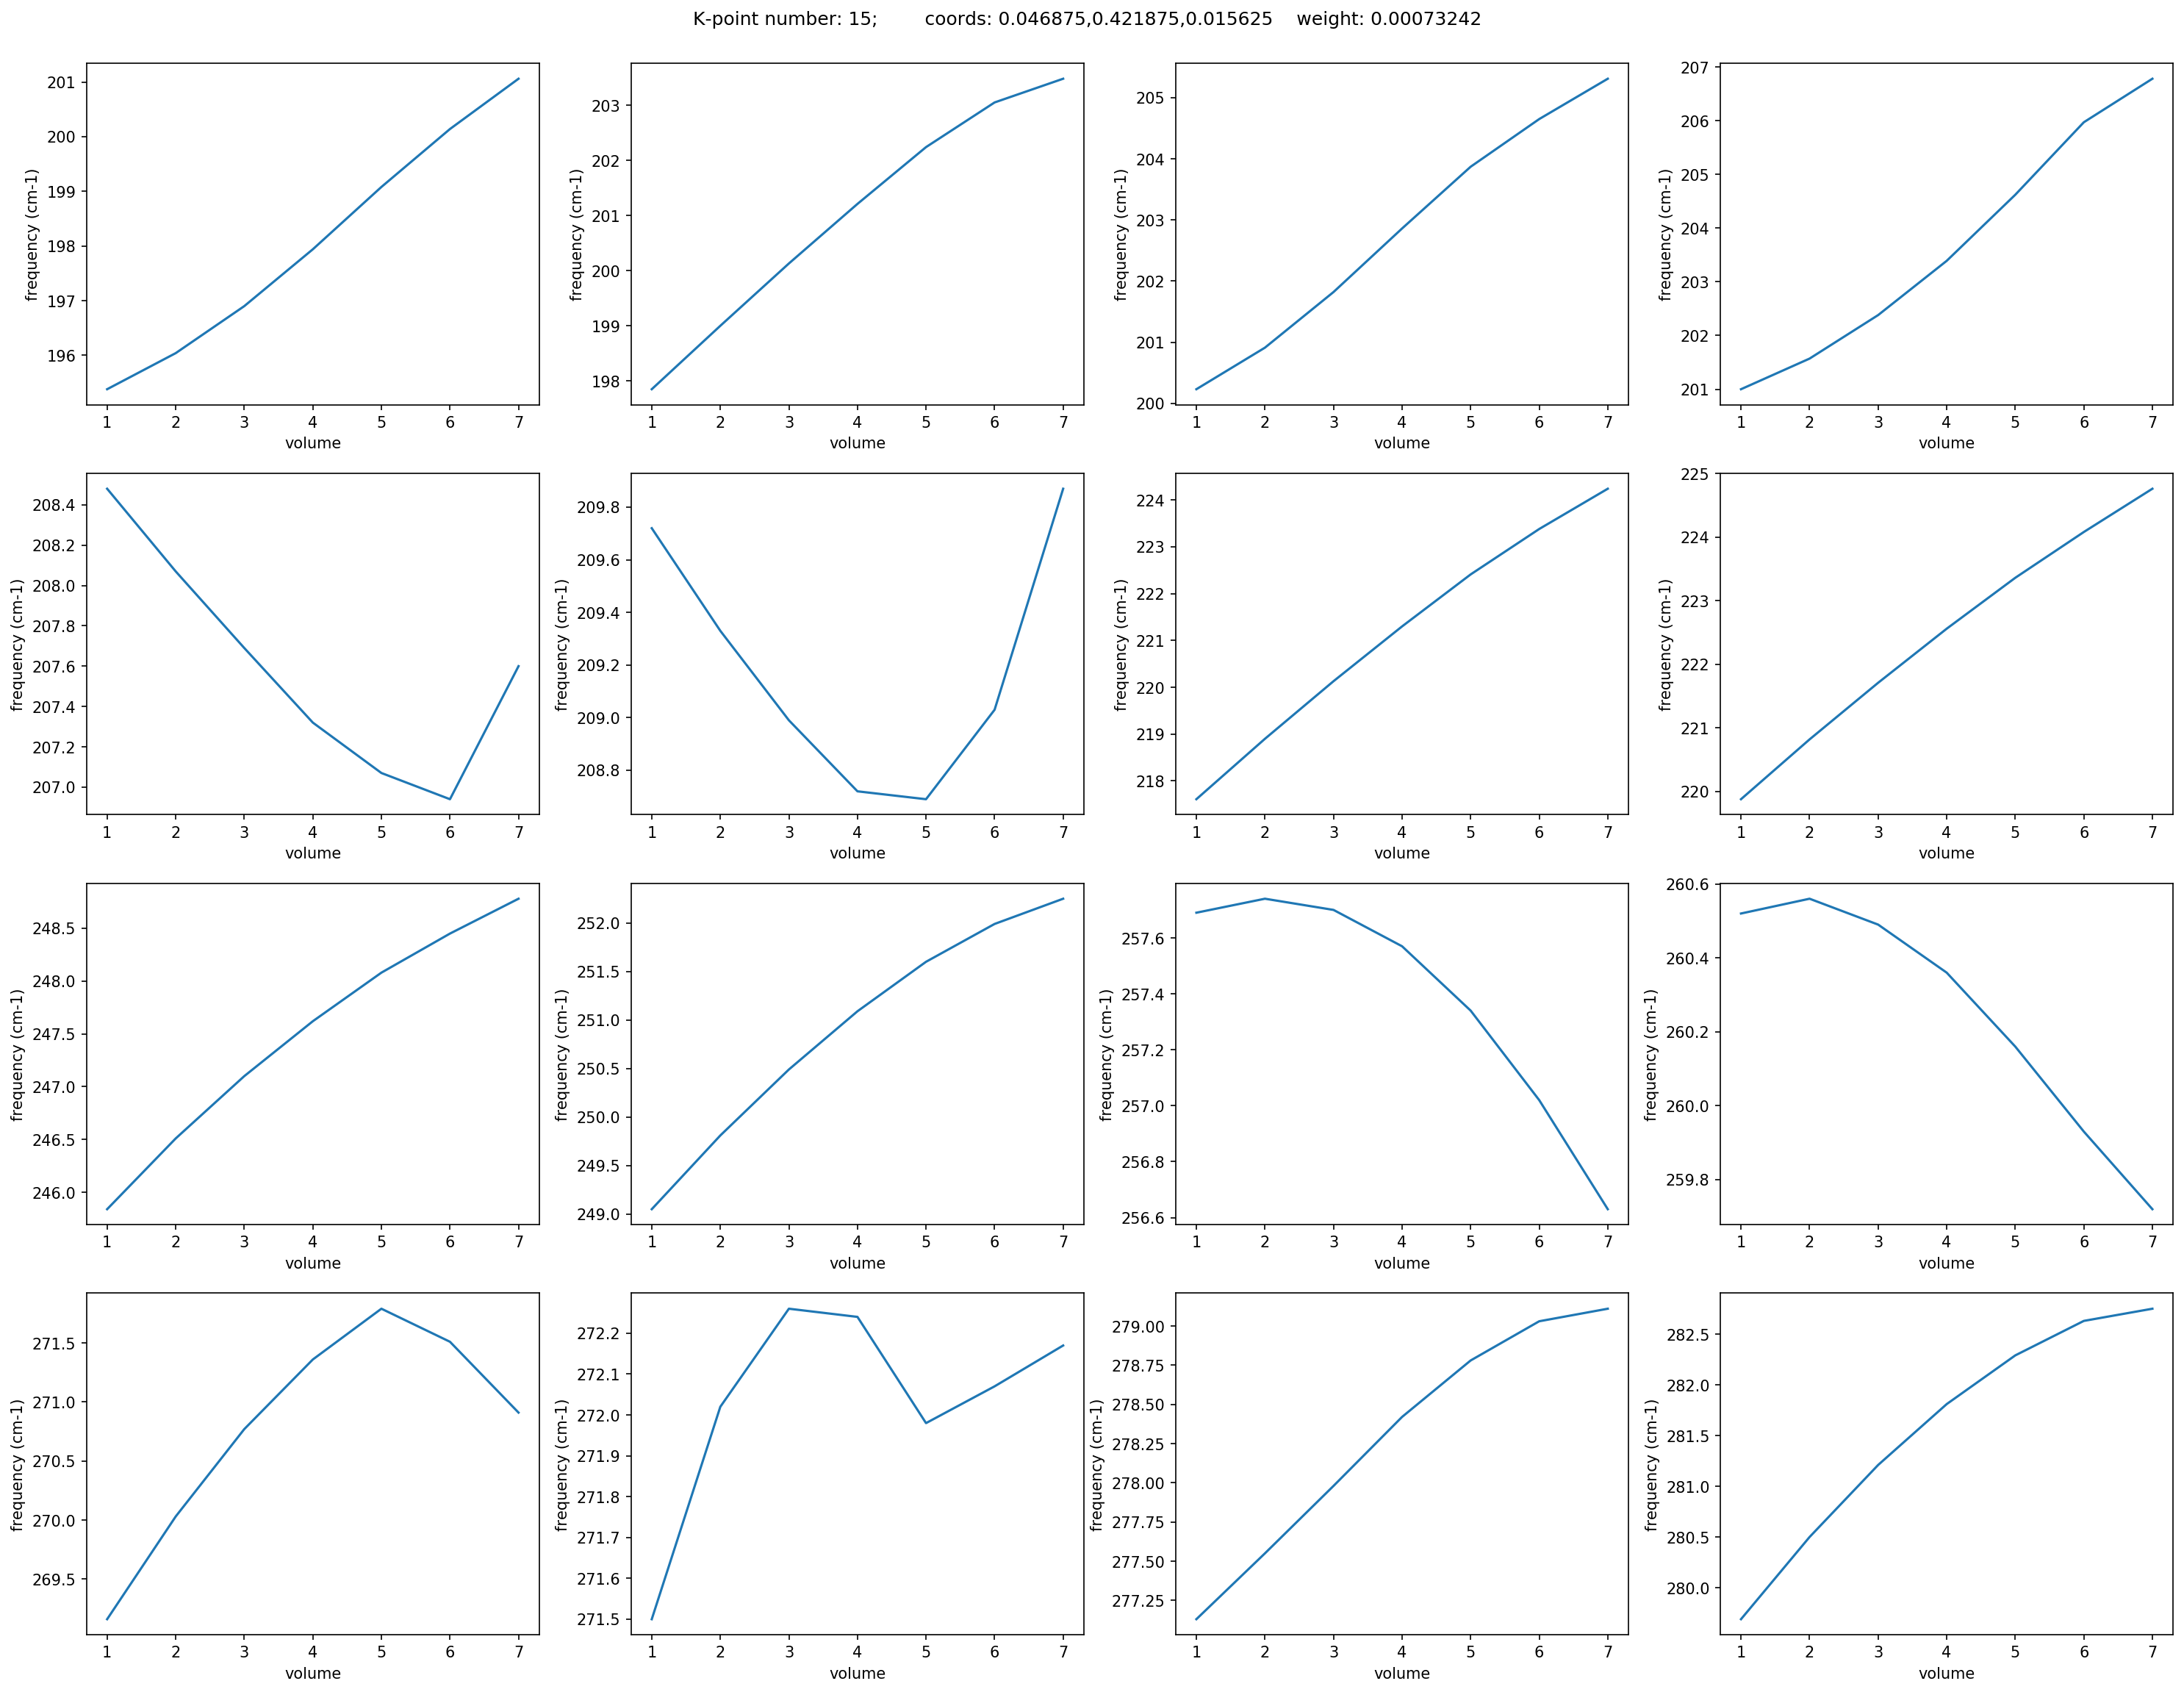

In [29]:
import matplotlib.pyplot as plt

kpoint = 15
fig = plt.figure(dpi=150,figsize=(20, 15), tight_layout=True)

start = 40
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    y = [data[x][kpoint][start+i] for x in range(len(v_list))]
    print(y)
    ax.plot(v_list,y)
    ax.set_xlabel('volume')
    ax.set_ylabel('frequency (cm-1)')
plt.suptitle('K-point number: {0};        coords: {1},{2},{3}    weight: {4}'.format(
    kpoint, *kpoints_coords[kpoint], kpoints_weights[kpoint]),y=1.02)
plt.show()

[206.98, 207.0, 206.98, 207.19, 207.34, 207.34, 207.29]
[207.71, 207.84, 208.25, 208.75, 209.52, 210.52, 211.68]
[208.93, 209.6, 210.04, 210.72, 211.79, 213.07, 214.46]
[210.32, 210.88, 212.21, 213.75, 215.34, 216.9, 218.43]
[222.59, 223.93, 225.25, 226.55, 227.8, 228.98, 230.1]
[249.21, 249.37, 249.38, 249.25, 248.97, 248.54, 247.99]
[257.21, 257.14, 256.86, 256.21, 255.17, 253.93, 252.57]


<IPython.core.display.Javascript object>


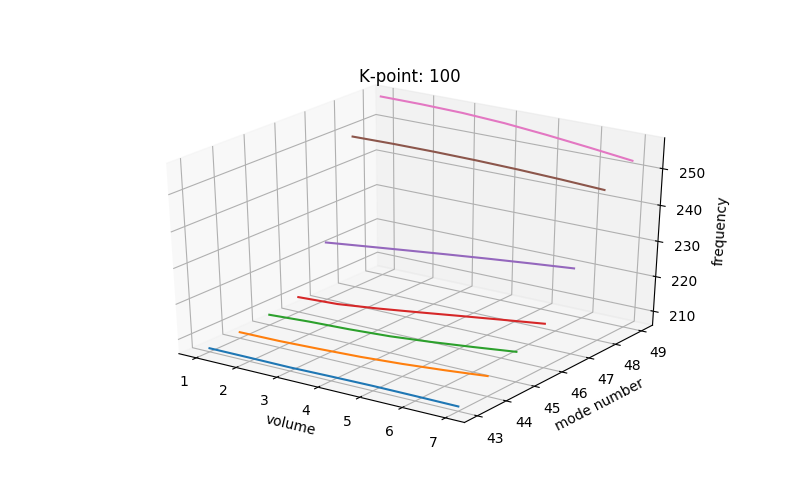

In [27]:
%matplotlib notebook

kpoint = 100
start = 43
datasets = []

for i in range(7):
    x = v_list #volume
    z = [data[x][kpoint][start+i] for x in range(len(v_list))] #frequencia
    y = len(v_list)*[start+i] #modo
    print(z)
    datasets.append({"x":x, "y":y, "z":z})

from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(8, 5))
for dataset in datasets:
    ax.plot(dataset["x"], dataset["y"], dataset["z"])

ax.set_xlabel('volume')
ax.set_ylabel('mode number')
ax.set_zlabel('frequency')
ax.set_title('K-point: {0}'.format(kpoint))
plt.show()


## Amaciamento das frequências

Criaremos um segundo conjunto de dados tridimensional com o mesmo formato, mas as frequências serão substituidas por valores calculados com um ajuste de polinômio de segundo grau.

In [48]:
#primeiro copiamos o conjunto
import copy 

data_smooth = copy.deepcopy(data)


total_number_of_kpoints = len(data[0])
total_number_of_modes = len(data[0][0])

print('Total number of k-points: {0}\nTotal number of modes per k-point: {1}'.format(
    total_number_of_kpoints,total_number_of_modes))


for kpoint in range(total_number_of_kpoints):
    for mode_number in range(total_number_of_modes):

        x = v_list #eixo x = volumes
        y = [data[i][kpoint][mode_number] for i in range(len(v_list))] #eixo y = um modo, de um determinado k-point, variando com o volume
        
        parameters = np.polyfit(x, y, 2)
        polynomial = np.poly1d(parameters)
        y_smooth = polynomial(x)
        
        for i in range(len(v_list)):
            data_smooth[i][kpoint][mode_number]=y_smooth[i]
        
 

Total number of k-points: 1376
Total number of modes per k-point: 132


Escreveremos tudo em um arquivo texto. Cada arquivo possuirá as frequencias em colunas e modos em linhas, para um determinado volume. A primeira coluna possui um índice de pontos k, a segunda, terceira e quarta coluna possui as coordenadas do ponto k no espaço recíproco, a quinta coluna possui o peso relativo do ponto k e as colunas 6 em diante possui as frequencias dos modos.

In [60]:
for i in range(len(v_list)):
    volume = v_list[i]
    
    #original modes calculated by gulp
    with open('modes_original_v{0}.txt'.format(volume), 'w') as f:
        f.write('#K-point \tx-coord \ty-coord \tz-coord \tweight \tfrequencies(cm-1)*3Ncolumns \n')
        
        for j in range(total_number_of_kpoints):
            modes_string = '\t'.join(['{:9.2f}'.format(s) for s in data[i][j]])
            initial_string = '{0}\t{1}\t{2}\t{3}\t{4}'.format(j+1, *kpoints_coords[j], kpoints_weights[j])
            f.write(initial_string + '\t' + modes_string + '\n')
    
    #smoothed modes 
    with open('modes_smooth_v{0}.txt'.format(volume), 'w') as f:
        f.write('#K-pt \tx-coord \ty-coord \tz-coord \trel. weight \tfrequencies(cm-1)*3Ncolumns \n')
        
        for j in range(total_number_of_kpoints):
            modes_string = '\t'.join(['{:9.2f}'.format(s) for s in data_smooth[i][j]])
            initial_string = '{0:4}\t{1:8.6f}\t{2:8.6f}\t{3:8.6f}\t{4:10.8f}'.format(j+1, *kpoints_coords[j], kpoints_weights[j])
            f.write(initial_string + '\t' + modes_string + '\n')

In [77]:
def get_data_gulp(file):
    '''
    Reads GULP output file and gather several informations. Returns several values:
    volume, zpe, F, temp, Epot = get_data_gulp(file)
    
    where:
       volume = unit cell volume (A^3)
       zpe = Zero point energy (eV)
       F = Helmholtz free-energy (eV)
       temp = Temperature (K)
       Epot = Potential energy (eV)
    '''
    with open(file, 'r') as f:
        Epot = False
        zpe = False
        F_gulp = False
        temp = False
        
        for line in f:
            if ('Total lattice energy       =' in line) and ('eV' in line):
                Epot = float(line.split()[-2])
            if 'Phonon properties (per mole of unit cells): Temperature =' in line:
                temp = float(line.split()[-2])
            if 'Helmholtz free-energy        =' in line:
                F_gulp = float(line.split()[3])
            if 'Zero point energy            =' in line:
                zpe_gulp = float(line.split()[4])
            if 'Initial cell volume =' in line:
                volume = float(line.split()[4])
    return volume, zpe, F, temp, Epot


volume, zpe, F, temp, Epot = get_data_gulp('free_T150_i1.gout')
print(volume, zpe, F, temp, Epot)

756.371456 False False 150.0 -2439.37823871


In [ ]:
Helmholtz free-energy calculation:

Free-energy Temperature: 150.0 K
|              |            GULP             |       Sum over modes        |   Sum over smoothed modes   |
| Volume (A^3) |    F (eV)    |  Epot (eV)   |  Fvib (eV)   |    F (eV)    |  Fvib (eV)   |    F (eV)    |
----------------------------------------------------------------------------------------------------------
  756.371456    -2435.761886   -2439.378239     4.187953     -2435.190286     4.187892     -2435.190346 
  760.178688    -2435.821659   -2439.425371     4.186224     -2435.239147     4.186259     -2435.239112 
  763.998674    -2435.849272   -2439.456143     4.184884     -2435.271259     4.184930     -2435.271213 
  767.831434    -2435.858482   -2439.470835     4.183822     -2435.287013     4.183824     -2435.287011 
  771.676993    -2435.851357   -2439.469733     4.182934     -2435.286799     4.182887     -2435.286846 
  775.535371    -2435.827777   -2439.453124     4.182116     -2435.271008     4.182082     -2435.271042 
  779.406589    -2435.790361   -2439.421301     4.181353     -2435.239948     4.181391     -2435.239910 
----------------------------------------------------------------------------------------------------------


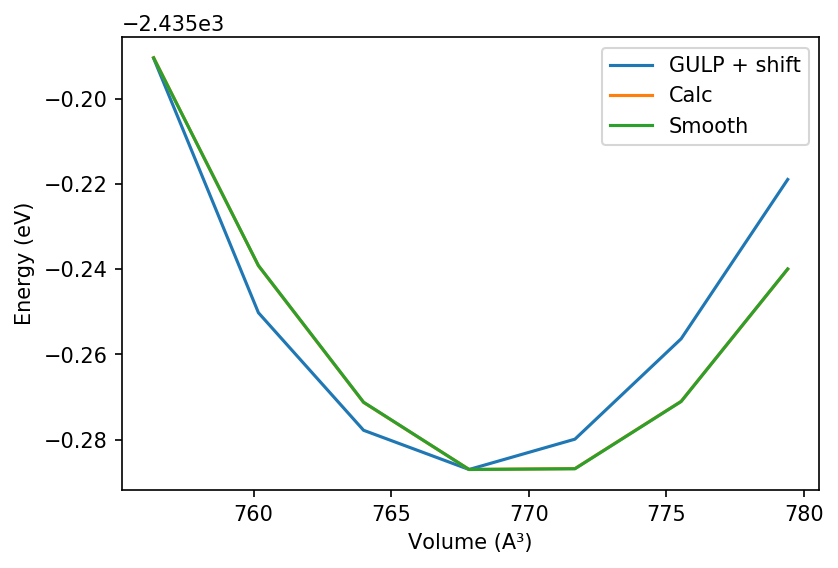

In [87]:
volume = np.array([756.371456,760.178688,763.998674,767.831434,771.676993,775.535371,779.406589])
F_gulp = np.array([-2435.761886,-2435.821659,-2435.849272,-2435.858482,-2435.851357,-2435.827777,-2435.790361])
F_calc = np.array([-2435.190286,-2435.239147,-2435.271259,-2435.287013,-2435.286799,-2435.271008,-2435.239948])
F_smooth = np.array([-2435.190346,-2435.239112,-2435.271213,-2435.287011,-2435.286846,-2435.271042,-2435.239910])

fig = plt.figure(dpi=150)
shift = min(F_gulp)-min(F_calc)
plt.plot(volume, F_gulp-shift, label='GULP + shift')
plt.plot(volume, F_calc, label='Calc')
plt.plot(volume, F_smooth, label='Smooth')

plt.xlabel('Volume (A³)')
plt.ylabel('Energy (eV)')
plt.legend()
plt.show()

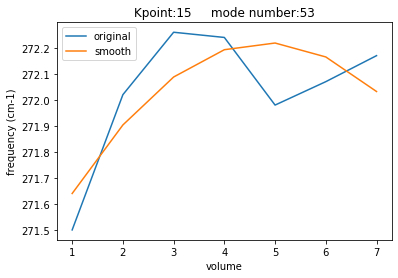

In [49]:
kpoint=15
mode_number = 53


plt.plot(v_list, [data[i][kpoint][mode_number] for i in range(len(v_list))], label='original')
plt.plot(v_list, [data_smooth[i][kpoint][mode_number] for i in range(len(v_list))], label='smooth')
plt.title('Kpoint:{0}     mode number:{1}'.format(kpoint, mode_number))
plt.xlabel('volume')
plt.ylabel('frequency (cm-1)')
plt.legend()
plt.show()

In [65]:
import glob
import sys
import numpy as np

####################################################################################
#ASSUMPTIONS:
#    ALL FILES HAVE THE SAME MONKHORST-PACK MESH
#    ALL FILES HAVE THE SAME NUMBER OF ATOMS PER UNIT CELL
#    FREQUENCIES ARE READ IN CM-1
####################################################################################

def get_kpoints_weights_and_coords(file):
    with open(file, 'r') as f:
        lines = f.readlines()
        
    N = 0
    N_begin_klist = len(lines)
    kpoints_weights = []
    kpoints_coords = []
    
    for n, line in enumerate(lines):
        if 'Brillouin zone sampling points :' in line:
            N_begin_klist = n+5
        
        if '--------------------------------' in line and n>N_begin_klist:
            N_end_klist = n-1
            N, x, y, z, w = [float(a) for a in lines[N_end_klist].split()]
            break
        
    for line in lines[N_begin_klist:N_end_klist+1]:
        n, x, y, z, w = [float(a) for a in line.split()]
        kpoints_weights.append(w)
        kpoints_coords.append((x, y, z))
    
    if N==0:
        print('Could not find K points list while reading file {0}.'.format(file))
        return kpoints_weights, kpoints_coords
    
    return kpoints_weights, kpoints_coords



def get_frequencies(file):
    with open(file, 'r') as f:
        lines = f.readlines()
    
    n_begin_freq = len(lines)
    getting_frequencies = False
    frequency_list = []
    
    Kpoints_freqs_list = []
    
    
    for n,line in enumerate(lines):
        
        if getting_frequencies and len(line.split())<1 and n>n_begin_freq:
            getting_frequencies = False
            frequency_list = np.array(frequency_list)
            Kpoints_freqs_list.append(frequency_list)
            frequency_list = []
            
        if 'Frequencies (cm-1) [NB: Negative implies an imaginary mode]:' in line:
            n_begin_freq = n+2
            getting_frequencies = True
                                  
        if getting_frequencies and n>=n_begin_freq:
            f = line.split()
            for i in f:
                frequency_list.append(float(i))
            
            
    return Kpoints_freqs_list

def get_volume(file):
    with open(file, 'r') as f:
        for line in f:
            if 'Initial cell volume =' in line:
                volume = float(line.split()[4])
                break    
    return volume
##################################################################################


#reads files and construct data structure (a list of lists of lists)

if len(sys.argv) < 2:
    print('Please provide a file pattern to generate the file list to be analysed.')
    print('Example: if you want to use the files out_v1.gout, out_v2.gout, out_v3.gout, and out_v4.gout')
    print('         for the frequency smoothing, you could use the following command:')
    print('         $ smooth_modes.py out_v*.gout')
    exit()

print(sys.argv[1])
file_list = glob.glob(sys.argv[1])

print('List of files to br used:')
for file in file_list:
    print(file)

answer = input('Are these the intended files? (y/[n])')

if answer!='y' and answer!='Y':
    exit()
else:
    pass

data = [] #data[volume][kpoint][mode_number]
v_list = []
for file in file_list:
    v=get_volume(file)
    Kpoints_freqs_list = get_frequencies(file)
    kpoints_weights, kpoints_coords = get_kpoints_weights_and_coords(file)
    v_list.append(v)
    data.append(Kpoints_freqs_list)
    

#smooths frequencies using a second degree polynomial

data_smooth = list(data)
total_number_of_kpoints = len(data[0])
total_number_of_modes = len(data[0][0])

print('Total number of k-points: {0}\nTotal number of modes per k-point: {1}'.format(
    total_number_of_kpoints,total_number_of_modes))


for kpoint in range(total_number_of_kpoints):
    for mode_number in range(total_number_of_modes):

        x = v_list #eixo x = volumes
        y = [data[i][kpoint][mode_number] for i in range(len(v_list))] #eixo y = um modo, de um determinado k-point, variando com o volume
        
        parameters = np.polyfit(x, y, 2)
        polynomial = np.poly1d(parameters)
        y_smooth = polynomial(x)
        
        for i in range(len(v_list)):
            data_smooth[i][kpoint][mode_number]=y_smooth[i]

#writes all data structures to text files
for i in range(len(v_list)):
    volume = '{0:.2f}'.format(v_list[i])
    
    #original modes calculated by gulp
    with open('modes_original_v{0}.txt'.format(volume), 'w') as f:
        f.write('#K-point \tx-coord \ty-coord \tz-coord \tweight \tfrequencies(cm-1)*3Ncolumns \n')
        
        for j in range(total_number_of_kpoints):
            modes_string = '\t'.join(['{:9.2f}'.format(s) for s in data[i][j]])
            initial_string = '{0}\t{1}\t{2}\t{3}\t{4}'.format(j+1, *kpoints_coords[j], kpoints_weights[j])
            f.write(initial_string + '\t' + modes_string + '\n')
    
    #smoothed modes 
    with open('modes_smooth_v{0}.txt'.format(volume), 'w') as f:
        f.write('#K-pt \tx-coord \ty-coord \tz-coord \trel. weight \tfrequencies(cm-1)*3Ncolumns \n')
        
        for j in range(total_number_of_kpoints):
            modes_string = '\t'.join(['{:9.2f}'.format(s) for s in data_smooth[i][j]])
            initial_string = '{0:4}\t{1:8.6f}\t{2:8.6f}\t{3:8.6f}\t{4:10.8f}'.format(j+1, *kpoints_coords[j], kpoints_weights[j])
            f.write(initial_string + '\t' + modes_string + '\n') 

['modes_smooth_v7.txt',
 'modes_smooth_v1.txt',
 'modes_smooth_v2.txt',
 'modes_smooth_v4.txt',
 'modes_smooth_v5.txt',
 'modes_smooth_v3.txt',
 'modes_smooth_v6.txt']